In [25]:
import pandas as pd 
import numpy as np

df=pd.read_csv("StudentsPerformance.csv", sep="," ,low_memory=False)

In [26]:
print(df.head())
print(df.info())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtyp

In [27]:

df.columns = df.columns.str.strip() 
print(df.columns.tolist())

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']


In [ ]:
df['average_score'] = np.mean(df[['math score', 'reading score', 'writing score']], axis=1)

 

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score', 'average_score']


In [30]:
df['performance']=np.where(
    df['average_score']>=90,'excelent',
    np.where(df['average_score']>=70, 'Good','needs improvment')
)
df[['math score', 'reading score', 'writing score', 'average_score', 'performance']].head()


,math score,reading score,writing score,average_score,performance
0,72,72,74,72.666667,Good
1,69,90,88,82.333333,Good
2,90,95,93,92.666667,excelent
3,47,57,44,49.333333,needs improvment
4,76,78,75,76.333333,Good


In [ ]:
#Gender	Which gender performs better overall

gender_avg = df.groupby('gender')[['math score', 'reading score', 'writing score', 'average_score']].mean()
print(gender_avg)


        math score  reading score  writing score  average_score
gender                                                         
female   63.633205      72.608108      72.467181      69.569498
male     68.728216      65.473029      63.311203      65.837483


In [ ]:
'''
Parental Education	Does a parent’s education level affect performance?''' 
perf_count = df.groupby('parental level of education')['performance'].value_counts().unstack()
print(perf_count)


performance                  Good  excelent  needs improvment
parental level of education                                  
associate's degree             94        16               112
bachelor's degree              53        13                52
high school                    63         2               131
master's degree                30         6                23
some college                   97        11               118
some high school               70         4               105


In [33]:
#Test Prep	Is the test prep course effective?
prep_avg = df.groupby('test preparation course')['average_score'].mean()
print(prep_avg)


test preparation course
completed    72.669460
none         65.038941
Name: average_score, dtype: float64


In [37]:
df.to_csv("cleaned_student_data.csv", index=False)
df.to_excel("cleaned_student_data.xlsx", index=False)


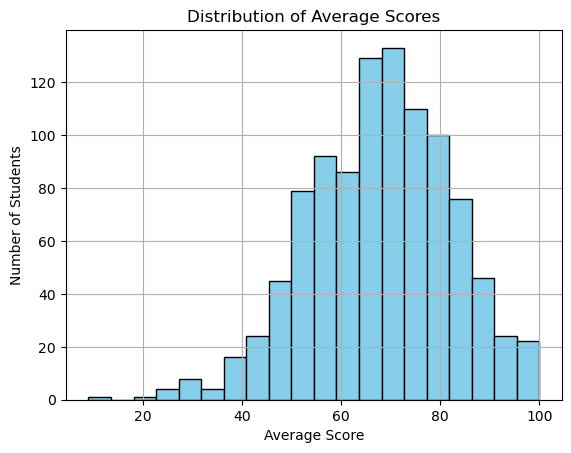

In [ ]:
#Distribution of Average Scores
import matplotlib.pyplot as plt

df['average_score'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Average Scores")
plt.xlabel("Average Score")
plt.ylabel("Number of Students")
plt.grid(True)
plt.show()


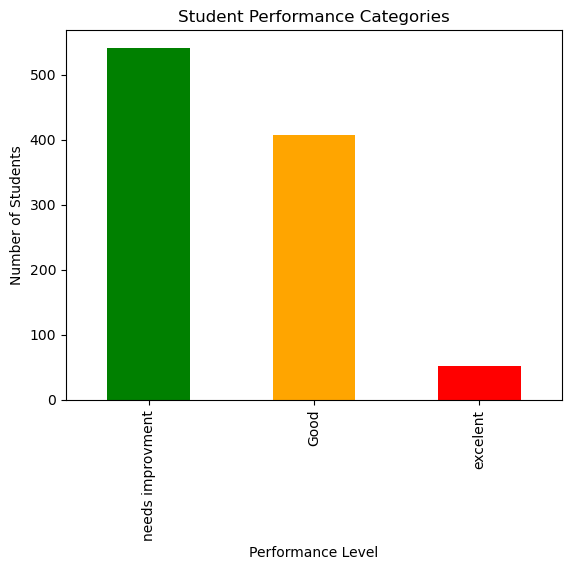

In [39]:
#Count of Students by Performance Category
df['performance'].value_counts().plot(kind='bar', color=['green', 'orange', 'red'])
plt.title("Student Performance Categories")
plt.xlabel("Performance Level")
plt.ylabel("Number of Students")
plt.show()


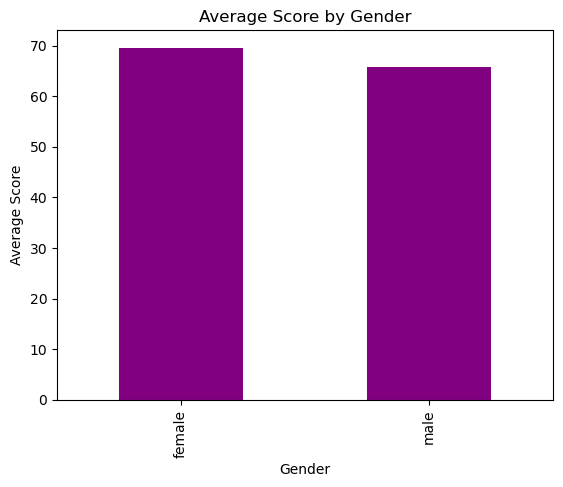

In [40]:
#Average Score by Gender
df.groupby('gender')['average_score'].mean().plot(kind='bar', color='purple')
plt.title("Average Score by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Score")
plt.show()
